In [17]:
#taux des admis
# les bibliotheques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# charger la data 
df = pd.read_csv('source_Data_1.csv')
df.head()

,Total_admis,Taux_Des_Admins,redoublant,TAUX_DE_REDOUBLANT,exclus,Taux_des_exclus,NombreETUD,ANNEE DEB,ANNE UNIVERSITAIRE
0,5632,"86,55 %",175,"2,69 %",NaN,NaN,6507,2019,2019-2020
1,4877,"91,38 %",716,"13,42 %",1.0,"0,02 %",5337,2018,2018-2019
2,4294,"92,58 %",505,"10,89 %",NaN,NaN,4638,2017,2017-2018
3,3816,"90,79 %",826,"19,65 %",NaN,NaN,4203,2016,2016-2017


In [19]:
#les variables explicatives
X = df[['Taux_Des_Admins','TAUX_DE_REDOUBLANT','Taux_des_exclus']].values
X[0:5]

array([['86,55 %', '2,69 %', nan],
       ['91,38 %', '13,42 %', '0,02 %'],
       ['92,58 %', '10,89 %', nan],
       ['90,79 %', '19,65 %', nan]], dtype=object)

In [20]:
from sklearn import preprocessing
le_gender = preprocessing.LabelEncoder()
#le_gender.fit(['True','False'])
le_gender.fit(X[:,0])
print('before transformation ', '..'*20)
print(X[0:5])
print('After transformation..', '..'*20)
X[:,0] = le_gender.transform(X[:,0]) 
X[0:5]

before transformation  ........................................
[['86,55 %' '2,69 %' nan]
 ['91,38 %' '13,42 %' '0,02 %']
 ['92,58 %' '10,89 %' nan]
 ['90,79 %' '19,65 %' nan]]
After transformation.. ........................................


array([[0, '2,69 %', nan],
       [2, '13,42 %', '0,02 %'],
       [3, '10,89 %', nan],
       [1, '19,65 %', nan]], dtype=object)

In [21]:
from sklearn import preprocessing
le_gender = preprocessing.LabelEncoder()
#le_gender.fit(['True','False'])
le_gender.fit(X[:,1])
print('before transformation ', '..'*20)
print(X[0:5])
print('After transformation..', '..'*20)
X[:,1] = le_gender.transform(X[:,1]) 
X[0:5]

before transformation  ........................................
[[0 '2,69 %' nan]
 [2 '13,42 %' '0,02 %']
 [3 '10,89 %' nan]
 [1 '19,65 %' nan]]
After transformation.. ........................................


array([[0, 3, nan],
       [2, 1, '0,02 %'],
       [3, 0, nan],
       [1, 2, nan]], dtype=object)

In [22]:
from sklearn import preprocessing
le_gender = preprocessing.LabelEncoder()
#le_gender.fit(['True','False'])
le_gender.fit(X[:,2])
print('before transformation ', '..'*20)
print(X[0:5])
print('After transformation..', '..'*20)
X[:,2] = le_gender.transform(X[:,2]) 
X[0:5]

before transformation  ........................................
[[0 3 nan]
 [2 1 '0,02 %']
 [3 0 nan]
 [1 2 nan]]
After transformation.. ........................................


array([[0, 3, 1],
       [2, 1, 0],
       [3, 0, 1],
       [1, 2, 1]], dtype=object)

In [23]:
#variable cible
y = df["NombreETUD"]
y[0:5]

0    6507
1    5337
2    4638
3    4203
Name: NombreETUD, dtype: int64

In [24]:
# diviser la data
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=3)

In [25]:
#appliquer le model
from sklearn.linear_model import LinearRegression

In [26]:
#train
lr = LinearRegression()
lr.fit(X_trainset , y_trainset)

LinearRegression()

In [28]:
lr.intercept_

5648.5

In [29]:
# prediction
pred = lr.predict(X_testset)
pred

array([5884.])

In [30]:
y_testset==pred

3    False
Name: NombreETUD, dtype: bool

In [31]:
#out put un fichier csv
df1=pd.DataFrame(np.c_[X_testset , y_testset , pred ,] ,columns =['Taux_Des_Admins','TAUX_DE_REDOUBLANT','Taux_des_exclus', 'NOMBRE_ETUD' , 'Predicted Marks'])
print(df1)
#df1.to_csv (r'export_dataframe.csv', index = False, header=True)


  Taux_Des_Admins TAUX_DE_REDOUBLANT Taux_des_exclus NOMBRE_ETUD  \
0               1                  2               1        4203   

  Predicted Marks  
0            5884  


In [32]:
p = df1["Predicted Marks"]


print(p)

r1=round(int(p))
print(r1)

0    5884
Name: Predicted Marks, dtype: object
5884


In [48]:
new_df=df.assign(pred_effec_next_year_2020=p)
print(new_df)
new_df.to_csv (r'predict_ETU_Selon_les_Taux.csv', index = True, header=True)

   Total_admis Taux_Des_Admins  redoublant TAUX_DE_REDOUBLANT  exclus  \
0         5632         86,55 %         175             2,69 %     NaN   
1         4877         91,38 %         716            13,42 %     1.0   
2         4294         92,58 %         505            10,89 %     NaN   
3         3816         90,79 %         826            19,65 %     NaN   

  Taux_des_exclus  NombreETUD  ANNEE DEB ANNE UNIVERSITAIRE  \
0             NaN        6507       2019          2019-2020   
1          0,02 %        5337       2018          2018-2019   
2             NaN        4638       2017          2017-2018   
3             NaN        4203       2016          2016-2017   

  pred_effec_next_year_2020  
0                      5884  
1                       NaN  
2                       NaN  
3                       NaN  


In [49]:
new_df = pd.read_csv('predict_ETU_Selon_les_Taux.csv')
new_df.head()

,Unnamed: 0,Total_admis,Taux_Des_Admins,redoublant,TAUX_DE_REDOUBLANT,exclus,Taux_des_exclus,NombreETUD,ANNEE DEB,ANNE UNIVERSITAIRE,pred_effec_next_year_2020
0,0,5632,"86,55 %",175,"2,69 %",NaN,NaN,6507,2019,2019-2020,5884.0
1,1,4877,"91,38 %",716,"13,42 %",1.0,"0,02 %",5337,2018,2018-2019,NaN
2,2,4294,"92,58 %",505,"10,89 %",NaN,NaN,4638,2017,2017-2018,NaN
3,3,3816,"90,79 %",826,"19,65 %",NaN,NaN,4203,2016,2016-2017,NaN


In [42]:
#evaluation
lr.score(X_trainset,y_trainset)

1.0

In [43]:
print(y_trainset)

1    5337
0    6507
2    4638
Name: NombreETUD, dtype: int64


<ipython-input-44-23e87a97e8c5>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes = plt.axes()


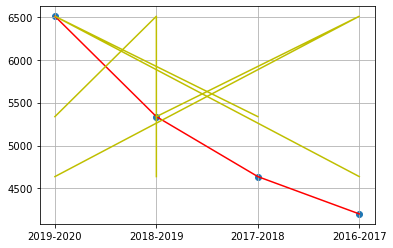

In [44]:
#plt.scatter(X_trainset ,  y_trainset)

plt.plot(df["ANNE UNIVERSITAIRE"],df.NombreETUD, color='r')
#plt.plot(df.ANNEE_DEB,df.NombreETUD, color='b')
X= df["ANNE UNIVERSITAIRE"]
#selection de deuxième colonnes de notre dataset (le profit effectué)
Y= df.NombreETUD 
 
axes = plt.axes()
axes.grid() # dessiner une grille pour une meilleur lisibilité du graphe
plt.scatter(X,Y) # X et Y sont les variables qu'on a extraite dans le paragraphe précédent


plt.plot(X_trainset ,lr.predict(X_trainset) , color='y')
plt.show()



Text(0.5, 1.0, "Exemple d'  evolution des etudiants par annee universitaire")

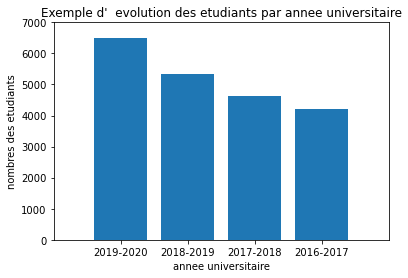

In [47]:
x = df["ANNE UNIVERSITAIRE"]
y=df["NombreETUD"]
plt.bar(x,y)
plt.axis(xmin = -1, xmax = 4, ymin = -1, ymax = 7000)
plt.xlabel('annee universitaire')
plt.ylabel('nombres des etudiants')
plt.title('Exemple d\'  evolution des etudiants par annee universitaire')